In [1]:
#Behind the scenes data creation
import pandas as pd

dogs = pd.DataFrame({'Name': ['Bella', 'Charlie', 'Lucy', 'Cooper', 'Max', 'Stella', 'Bernie'], 
'breed':['Labrador','Poodle', 'Chow Chow', 'Schnauzer', 'Labrador', 'Chihuahua', 'St. Bernard'],
'color':['Brown', 'Black', 'Brown', 'Gray', 'Black', 'Tan', 'White'],
'height_cm':[56, 43, 46, 49, 59, 18, 77],
'weight_kg':[24, 24, 24, 17, 29, 2, 74], 
'dob':['2013-07-01', '2016-09-16', '2014-08-25', '2011-12-11', '2017-01-20', '2015-04-20', '2018-02-27']})


homelessness = pd.read_pickle('C:\\datacamp\\03-DataManipulationswithPandas\\data\\homeless_data.pkl')
sales = pd.read_pickle('C:\\datacamp\\03-DataManipulationswithPandas\\data\\walmart_sales.pkl.bz2', compression = 'bz2')
sales_1_1 = sales.loc[(sales['store'] == 1) & (sales['department'] == 1)]

# Data Manipulation with pandas

## Chapter 2 - Aggregating Data

### Summary Statistics

#### Summarizing Numerical Data
Summary statistics are numbers that summarize and tell you about the dataset. The most common summary statistic is the mean statistic that tells where the center of the data is. To calculate the mean of a column, the column is selected using square brackets and the .mean() function. Other summary statistic functions include:

.median() - the value separating the higher half of the data from the lower half<br />
.mode() - the value that occurs most frequently in the data<br />
.min() - the lowest value in the data<br />
.max() - the highest value in the data<br />
.var() - the variance of the data, measuring how far the data is spread out from its average value.<br /> 
.std() - the standard deviation of the data, measuring the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range.<br />
.sum() - a total of all values in the data<br />
.quantile() - divides the data into intervals with equal probability

In [2]:
dogs['height_cm'].mean()

49.714285714285715

#### Summarizing Dates
Date columns can also have summary statistics. To find the oldest dog in the list, use the .min() function on the dob column and find the youngest dog using the .max() function.

In [3]:
dogs['dob'].min()

'2011-12-11'

In [4]:
dogs['dob'].max()

'2018-02-27'

#### The .agg() Method

The aggregate or .agg() method allows you to compute custom summary statistics. The function below, pct30, takes in a column name and computes the 30th percentile of the column.<br />

Now the weight column can be subset from the dogs DataFrame and call the .agg() method and passing in the name of the pct30 function. This will return the 30th percentile of the dogs' weights.

In [5]:
def pct30(column):
    return column.quantile(.3)

dogs['weight_kg'].agg(pct30)

22.599999999999998

#### Summaries on Multiple Columns

The .agg() method can be used on more than one column by selecting multiple columns when subsetting the DataFrame, the .agg() method applies the pct30 function to both columns and returns the 30th percentile for each. 

In [6]:
dogs[["weight_kg", 'height_cm']].agg(pct30)

weight_kg    22.6
height_cm    45.4
dtype: float64

#### Mutliple Summaries

The .agg() method can also be used to get multiple summaries at once by passing .agg() a list of function names. 

In [7]:
def pct40(column):
    return column.quantile(0.4)

dogs['weight_kg'].agg([pct30, pct40])

pct30    22.6
pct40    24.0
Name: weight_kg, dtype: float64

### Cumulative Sum

Pandas also has methods for computing cumulative statistics. Calling the cumulative sum method, .cumsum(), on a column will return the sequence of partial sums of a the column. The first returned row will be the output of the data in the zero index. The second returned row will be the sum of the data in the zero and first index. The third returned row is the sum of the first, second and third rows' values, or the sum of index 0, index 1 and index 2's values and so on, with the last number being the sum of all the values in the column.

In [8]:
print(dogs['height_cm'])
print(dogs['height_cm'].cumsum())

0    56
1    43
2    46
3    49
4    59
5    18
6    77
Name: height_cm, dtype: int64
0     56
1     99
2    145
3    194
4    253
5    271
6    348
Name: height_cm, dtype: int64


### Cumulative Statistics

Pandas also has methods for other cumulative statistics: <\br>
** .cummax() - the maximum value of a numeric value that recurs within the column<\br>
** .cummin() - the minimum value of a numeric value that recurs within the column<\br>
** .cumprod() - the sequence of partial products of a given sequence<\br>

## Exercise 1
#### Mean and median
Summary statistics are exactly what they sound like - they summarize many numbers in one statistic. For example, mean, median, minimum, maximum, and standard deviation are summary statistics. Calculating summary statistics allows you to get a better sense of your data, even if there's a lot of it.

sales is available and pandas is loaded as pd.

__Instructions:__
*  Explore your new DataFrame first by printing the first few rows of the sales DataFrame.
*  Print information about the columns in sales.
*  Print the mean of the weekly_sales column.
*  Print the median of the weekly_sales column.

In [9]:
# Print the head of the sales DataFrame
print(sales.head())

# Print the info about the sales DataFrame
print(sales.info())

# Print the mean of weekly_sales
print(sales['weekly_sales'].mean())

# Print the median of weekly_sales
print(sales['weekly_sales'].median())

   store type  department       date  weekly_sales  is_holiday  temperature_c  \
0      1    A           1 2010-02-05      24924.50       False       5.727778   
1      1    A           2 2010-02-05      50605.27       False       5.727778   
2      1    A           3 2010-02-05      13740.12       False       5.727778   
3      1    A           4 2010-02-05      39954.04       False       5.727778   
4      1    A           5 2010-02-05      32229.38       False       5.727778   

   fuel_price_usd_per_l  unemployment  
0              0.679451         8.106  
1              0.679451         8.106  
2              0.679451         8.106  
3              0.679451         8.106  
4              0.679451         8.106  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 413119 entries, 0 to 413118
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   store                 413119 non-null  i

#### Summarizing dates
Summary statistics can also be calculated on date columns which have values with the data type datetime64. Some summary statistics — like mean — don't make a ton of sense on dates, but others are super helpful, for example minimum and maximum, which allow you to see what time range your data covers.<br>
<br>
sales is available and pandas is loaded as pd.

__Instructions:__
*  Print the maximum of the date column.
*  Print the minimum of the date column.

In [10]:
# Print the maximum of the date column
print(sales['date'].max())

# Print the minimum of the date column
print(sales['date'].min())

2012-10-26 00:00:00
2010-02-05 00:00:00


#### Efficient summaries
While pandas and NumPy have tons of functions, sometimes you may need a different function to summarize your data.<br>
<br>
The .agg() method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super efficient.<br>
<br>
In the custom function for this exercise, "IQR" is short for inter-quartile range, which is the 75th percentile minus the 25th percentile. It's an alternative to standard deviation that is helpful if your data contains outliers.<br>
<br>
sales is available and pandas is loaded as pd.<br>

__Instructions:__
1. Use the custom iqr function defined for you along with .agg() to print the IQR of the temperature_c column of sales.
2. Update the column selection to use the custom iqr function with .agg() to print the IQR of temperature_c, fuel_price_usd_per_l, and unemployment, in that order.
3. Update the aggregation functions called by .agg(): include iqr and np.median in that order.

In [11]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# Print IQR of the temperature_c column
print(sales['temperature_c'].agg(iqr))

# Update to print IQR of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c",'fuel_price_usd_per_l','unemployment']].agg(iqr))

import numpy as np

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))

15.299999999999994
temperature_c           15.300000
fuel_price_usd_per_l     0.211866
unemployment             1.672000
dtype: float64
        temperature_c  fuel_price_usd_per_l  unemployment
iqr             15.30              0.211866         1.672
median          16.75              0.911922         7.852


#### Cumulative statistics
Cumulative statistics can also be helpful in tracking summary statistics over time. In this exercise, you'll calculate the cumulative sum and cumulative max of a department's weekly sales, which will allow you to identify what the total sales were so far as well as what the highest weekly sales were so far.<br>
<br>
A DataFrame called sales_1_1 has been created for you, which contains the sales data for department 1 of store 1. pandas is loaded as pd.<br>

__Instructions:__
*  Sort the rows of sales_1_1 by the date column in ascending order.
*  Get the cumulative sum of weekly_sales and add it as a new column of sales_1_1 called cum_weekly_sales.
*  Get the cumulative maximum of weekly_sales, and add it as a column called cum_max_sales.
*  Print the date, weekly_sales, cum_weekly_sales, and cum_max_sales columns.

In [12]:
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values('date')

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

            date  weekly_sales  cum_weekly_sales  cum_max_sales
0     2010-02-05      24924.50          24924.50       24924.50
73    2010-02-12      46039.49          70963.99       46039.49
145   2010-02-19      41595.55         112559.54       46039.49
218   2010-02-26      19403.54         131963.08       46039.49
290   2010-03-05      21827.90         153790.98       46039.49
...          ...           ...               ...            ...
9883  2012-09-28      18947.81        3123160.62       57592.12
9956  2012-10-05      21904.47        3145065.09       57592.12
10028 2012-10-12      22764.01        3167829.10       57592.12
10101 2012-10-19      24185.27        3192014.37       57592.12
10172 2012-10-26      27390.81        3219405.18       57592.12

[143 rows x 4 columns]


### Counting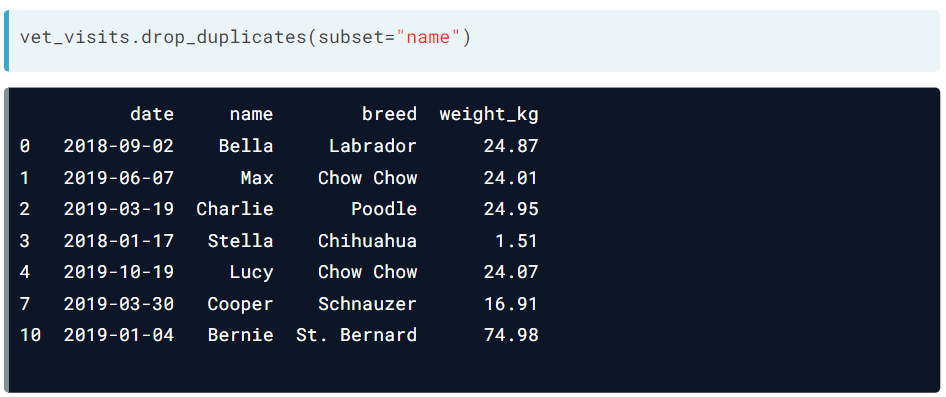

#### Double Counting
Categorical data is summarized using counting. A challenge when counting categorical data is avoiding double counting. In the example of dogs visiting the vet, if the vet wants to know how many of each type of breed has been seen by the practice, it will be important to ensure that a dog that has been to the vet's office more than once, like Stella, Max and Lucy in the DataFrame below are only counted once. 

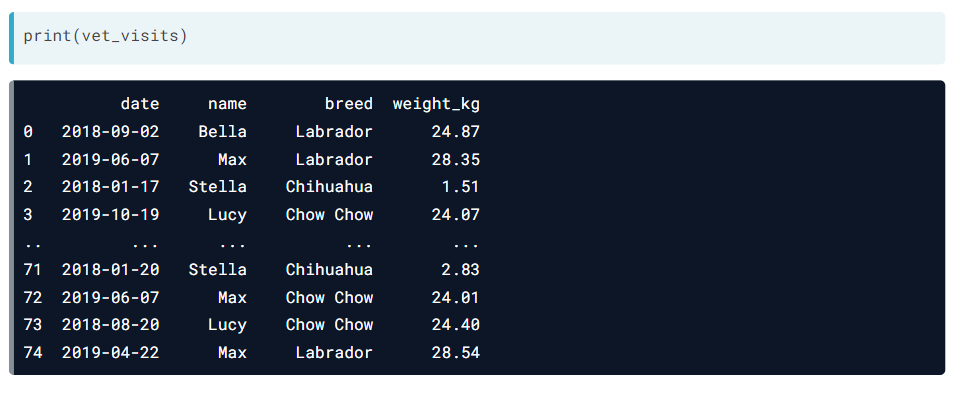

#### Dropping Duplicate Names
This can addressed by removing rows that contain a dog name that is already listed earlier in the dataset using the .drop_duplicates() method and pass the method the names column for the subset agrument used to determine how to subset the data.

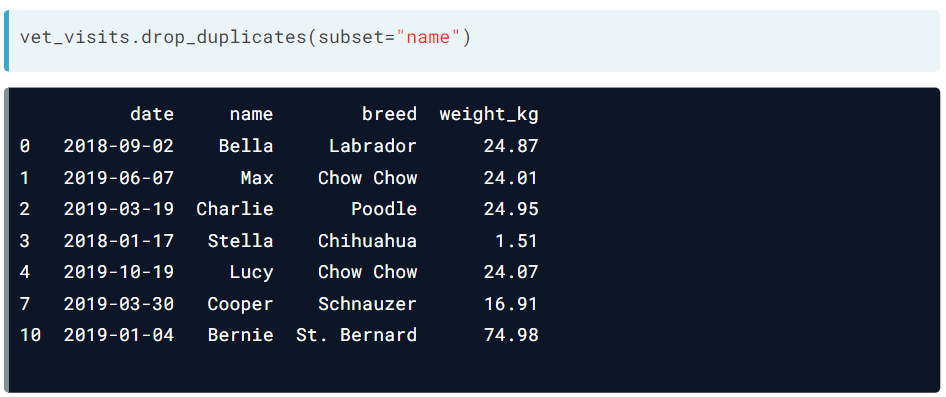

#### Dropping Duplicate Pairs
In the slice above, Max the Chow Chow is listed, but Max the labrador is missing. In this case, because there are two different dogs with the same name, more than just the dog's name will need to be considered when determining which rows are duplicates. Because Max and Max are different breeds, the subset argument can be based a list of columns to be used to determine which rows are duplicates. By passing both name and then breed, the slice will drop only those dogs who have the same name and the same breed and have already been counted.

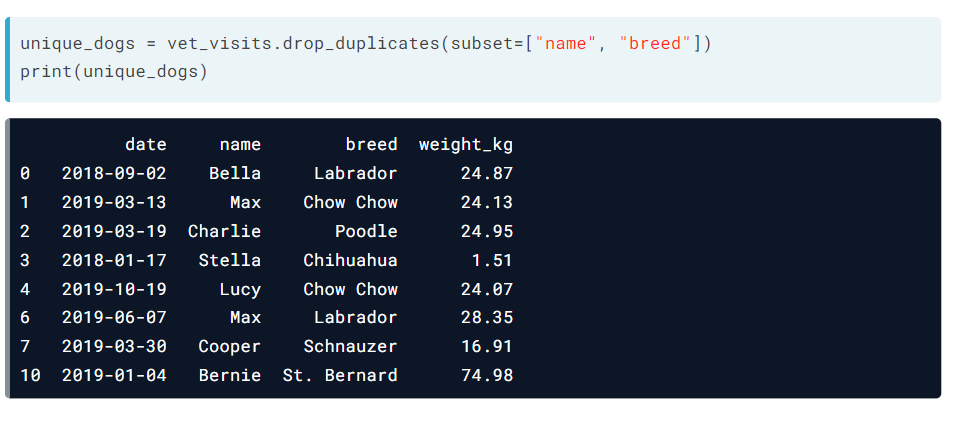

#### Easy as 1, 2, 3
With the vetvisit DataFrame subset to a DataFrame of unique dogs, the .value_counts() method can be called on the unique dogs DataFrame, subset by breed. By including the argument sort = True to the .value_counts() method, the count will be sorted by highest to lowest order.

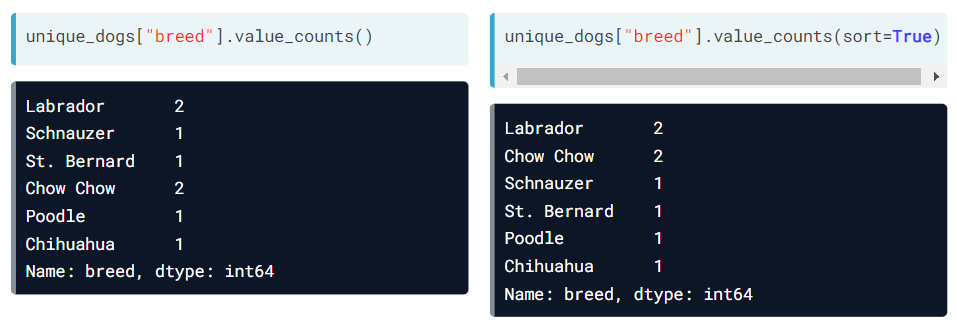

#### Proporations
The normalize agrument can be used to turn the count into proportions of the total.

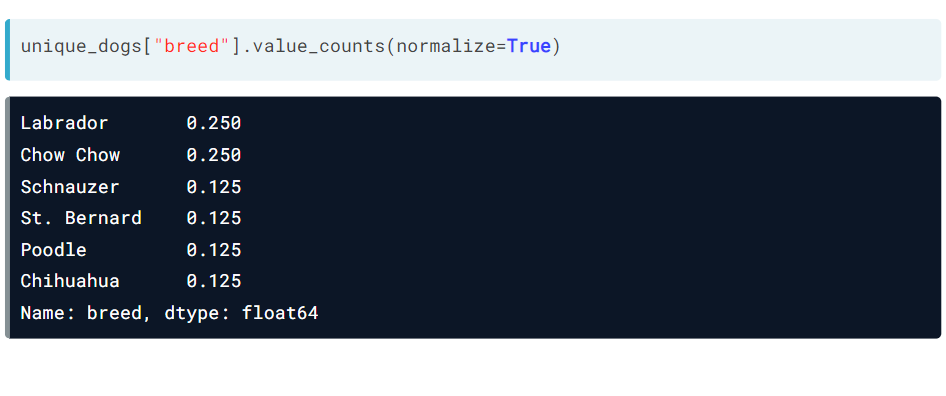

## Exercise 2
#### Dropping duplicates
Removing duplicates is an essential skill to get accurate counts, because often you don't want to count the same thing multiple times. In this exercise, you'll create some new DataFrames using unique values from sales.<br>
<br>
sales is available and pandas is imported as pd.<br>

__Instructions:__
*  Remove rows of sales with duplicate pairs of store and type and save as store_types and print the head.
*  Remove rows of sales with duplicate pairs of store and department and save as store_depts and print the head.
*  Subset the rows that are holiday weeks, and drop the duplicate dates, saving as holiday_dates.
*  Select the date column of holiday_dates, and print.'''


In [13]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset = ('store', 'type'))
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset = ('store', 'department'))
print(store_depts.head())

# Subset the rows that are holiday weeks and drop duplicate dates
holiday_dates = sales[sales['is_holiday']==True].drop_duplicates('date')

# Print date col of holiday_dates
print(holiday_dates['date'])

       store type  department       date  weekly_sales  is_holiday  \
0          1    A           1 2010-02-05      24924.50       False   
10244      2    A           1 2010-02-05      35034.06       False   
20482      3    B           1 2010-02-05       6453.58       False   
29518      4    A           1 2010-02-05      38724.42       False   
39790      5    B           1 2010-02-05       9323.89       False   

       temperature_c  fuel_price_usd_per_l  unemployment  
0           5.727778              0.679451         8.106  
10244       4.550000              0.679451         8.324  
20482       7.616667              0.679451         7.368  
29518       6.533333              0.686319         8.623  
39790       4.277778              0.679451         6.566  
   store type  department       date  weekly_sales  is_holiday  temperature_c  \
0      1    A           1 2010-02-05      24924.50       False       5.727778   
1      1    A           2 2010-02-05      50605.27       False 

#### Counting categorical variables
Counting is a great way to get an overview of your data and to spot curiosities that you might not notice otherwise. In this exercise, you'll count the number of each type of store and the number of each type of department.<br>
<br>
The stores and departments DataFrames you created in the last exercise are available and pandas is imported as pd.<br>

__Instructions:__
*  Count the number of stores of each type.
*  Count the proportion of stores of each type.
*  Count the number of departments of each type, sorting the counts in descending order.
*  Count the proportion of departments of each type, sorting the proportions in descending order.


In [14]:
stores = store_types[['store', 'type']]
departments = store_depts[['store', 'department']]

# Count the number of stores of each type
store_counts = stores['type'].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = stores['type'].value_counts(normalize = True)
print(store_props)

# Count the number of departments of each type and sort
dept_counts_sorted = departments['department'].value_counts(sort = True)
print(dept_counts_sorted)

# Get the proportion of departments of each type and sort
dept_props_sorted = departments['department'].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

A    22
B    17
C     6
Name: type, dtype: int64
A    0.488889
B    0.377778
C    0.133333
Name: type, dtype: float64
1     45
9     45
4     45
6     45
8     45
      ..
37    20
50    14
43     5
39     5
65     1
Name: department, Length: 81, dtype: int64
1     0.013778
9     0.013778
4     0.013778
6     0.013778
8     0.013778
        ...   
37    0.006124
50    0.004287
43    0.001531
39    0.001531
65    0.000306
Name: department, Length: 81, dtype: float64


### Grouped Summary Statistics

 In addition to calculating summaries on all the rows of data, summary statistice are also useful for comparing data between different groups. For example, does one color of dog weigh more than another? Below the dogs data is subset by color and mean is measure of each color's weight. But that's a lot of work and duplicated copy risks introducing copy and paste bugs. 
 
 The pandas .groupby() method allows you to pass a column name as an argument that the method should group the data by and the subset the data by the column name that is being measured and call the desired summary statistic method. 

In [15]:
print(dogs[dogs['color'] == 'Black']['weight_kg'].mean())
print(dogs[dogs['color'] == 'Brown']['weight_kg'].mean())
print(dogs[dogs['color'] == 'White']['weight_kg'].mean())
print(dogs[dogs['color'] == 'Gray']['weight_kg'].mean())
print(dogs[dogs['color'] == 'Tan']['weight_kg'].mean())

dogs.groupby('color')['weight_kg'].mean()

26.5
24.0
74.0
17.0
2.0


color
Black    26.5
Brown    24.0
Gray     17.0
Tan       2.0
White    74.0
Name: weight_kg, dtype: float64

### Multiple Grouped Summaries

Just like with ungrouped columns, the .agg() method can be used to get multiple summary statistics. Passing a list of summary statistic functions to .agg(), after using .groupby() to group by color and subsetting the data for the weight_kg column on which the list of summary statistics will be applied by the .agg() method.

In [16]:
dogs.groupby('color')['weight_kg'].agg([min, max, sum])

,min,max,sum
color,,,
Black,24,29,53
Brown,24,24,48
Gray,17,17,17
Tan,2,2,2
White,74,74,74


### Grouping by Multiple Variables

It's also possible to group by multiple columns by passing a list of multiple column names to the .groupby() method and then calculate summary statistics.

In [17]:
dogs.groupby(['color', 'breed'])['weight_kg'].mean()

color  breed      
Black  Labrador       29
       Poodle         24
Brown  Chow Chow      24
       Labrador       24
Gray   Schnauzer      17
Tan    Chihuahua       2
White  St. Bernard    74
Name: weight_kg, dtype: int64

### Many Groups, Many Summaries

It's also possible to group by many columns and aggregate on many columns by passing lists of columns.

In [18]:
dogs.groupby(['color', 'breed'])[['weight_kg', 'height_cm']].mean()

weight_kg  height_cm
color breed                            
Black Labrador            29         59
      Poodle              24         43
Brown Chow Chow           24         46
      Labrador            24         56
Gray  Schnauzer           17         49
Tan   Chihuahua            2         18
White St. Bernard         74         77

### Exercise 3
#### What percent of sales occurred at each store type?
While .groupby() is useful, you can calculate grouped summary statistics without it.<br>
<br>
Walmart distinguishes three types of stores: "supercenters", "discount stores", and "neighborhood markets", encoded in this dataset as type "A", "B", and "C". In this exercise, you'll calculate the total sales made at each store type, without using .groupby(). You can then use these numbers to see what proportion of Walmart's total sales were made at each.<br>
<br>
sales is available and pandas is imported as pd.<br>

__Instructions:__
*  Calculate the total weekly sales over the whole dataset.
*  Subset for type "A" stores, and calculate their total weekly sales.
*  Do the same for type "B" and type "C" stores.
*  Combine the A/B/C results into a list, and divide by overall sales to get the proportion of sales by type.

In [19]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.65137469 0.28763851 0.0609868 ]


#### Calculations with .groupby()
The .groupby() method makes life much easier. In this exercise, you'll perform the same calculations as last time, except you'll use the .groupby() method. You'll also perform calculations on data grouped by two variables to see if sales differs by store type depending on if it's a holiday week or not.<br>
<br>
sales is available and pandas is loaded as pd.<br>

__Instructions :__
1. Group sales by "type", take the sum of "weekly_sales", and store as sales_by_type. Calculate the proportion of sales at each store type by dividing by the sum of sales_by_type. Assign to sales_propn_by_type.

2. Group sales by "type" and "is_holiday", take the sum of weekly_sales, and store as sales_by_holiday_type.

In [20]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type/sales['weekly_sales'].sum()
print(sales_propn_by_type)

# From previous step
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(['type', 'is_holiday'])['weekly_sales'].sum()
print(sales_by_type_is_holiday)

type
A    0.651375
B    0.287639
C    0.060987
Name: weekly_sales, dtype: float64
type  is_holiday
A     False         4.007612e+09
      True          3.234028e+08
B     False         1.765411e+09
      True          1.471081e+08
C     False         3.772478e+08
      True          2.825570e+07
Name: weekly_sales, dtype: float64


#### Multiple grouped summaries
Earlier in this chapter you saw that the .agg() method is useful to compute multiple statistics on multiple variables. It also works with grouped data. NumPy, which is imported as np, has many different summary statistics functions, including:<br>
<br>
np.min()<br>
np.max()<br>
np.mean()<br>
np.median()<br>
sales is available and pandas is imported as pd.<br>

__Instructions:__
*  Import NumPy with the alias np.
*  Get the min, max, mean, and median of weekly_sales for each store type using .groupby() and .agg(). Store this as sales_stats.
*  Get the min, max, mean, and median of unemployment and fuel_price_usd_per_l for each store type. Store this as unemp_fuel_stats.

In [21]:
# Import NumPy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg(['min', 'max', 'mean', 'median'])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby('type')[['unemployment','fuel_price_usd_per_l']].agg(['min', 'max', 'mean', 'median'])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

          min        max          mean    median
type                                            
A    -4988.94  474330.10  20099.568043  10105.17
B    -3924.00  693099.36  12335.331875   6269.02
C     -379.00  112152.35   9519.532538   1149.67
     unemployment                          fuel_price_usd_per_l            \
              min     max      mean median                  min       max   
type                                                                        
A           3.879  14.313  7.791595  7.818             0.653034  1.180321   
B           4.125  14.313  7.889666  7.806             0.664129  1.180321   
C           5.217  14.313  8.934350  8.300             0.664129  1.180321   

                          
          mean    median  
type                      
A     0.883391  0.902676  
B     0.892997  0.922225  
C     0.888848  0.902676  


### Pivot Tables

Pivot tables are another way of calculating group summary statistics. 

#### Group by to Pivot Table

Previously .groupby() method was used to group by color and the weight_kg was selected to calculate the mean by color. The same thing can be done use Pandas .pivot_table(). The values argument is the column you want to summarize and the index argument is the column you want to group by. By default, .pivot_table() takes the mean value of the column passed to the value argument.

In [22]:
print(dogs.groupby('color')['weight_kg'].mean())

print(dogs.pivot_table(values = 'weight_kg', index = 'color'))

color
Black    26.5
Brown    24.0
Gray     17.0
Tan       2.0
White    74.0
Name: weight_kg, dtype: float64
       weight_kg
color           
Black       26.5
Brown       24.0
Gray        17.0
Tan          2.0
White       74.0


##### Different Statistics
If a different summary statistic is needed, use the aggfunc agrument to define the preferred statistic.

In [23]:
dogs.pivot_table(values = 'weight_kg', index = 'color', aggfunc = np.median)

,weight_kg
color,
Black,26.5
Brown,24.0
Gray,17.0
Tan,2.0
White,74.0


##### Multiple Summary Statistics
To get multiple summary statistics, a list of functions can be passed to the aggfunc argument.

In [24]:
dogs.pivot_table(values = 'weight_kg', index = 'color', aggfunc = [np.mean, np.median])

,mean,median
,weight_kg,weight_kg
color,,
Black,26.5,26.5
Brown,24.0,24.0
Gray,17.0,17.0
Tan,2.0,2.0
White,74.0,74.0


#### Pivot on Two Variables
Previously, .groupby() method was passed a list of columns to group the dataset by:

In [25]:
dogs.groupby(['color', 'breed'])['weight_kg'].mean()

color  breed      
Black  Labrador       29
       Poodle         24
Brown  Chow Chow      24
       Labrador       24
Gray   Schnauzer      17
Tan    Chihuahua       2
White  St. Bernard    74
Name: weight_kg, dtype: int64

This can also be done using the .pivot_table() method. To group by two variables, a second column name is passed into the columns agrument

In [26]:
dogs.pivot_table(values = 'weight_kg', index = 'color', columns = 'breed')

breed,Chihuahua,Chow Chow,Labrador,Poodle,Schnauzer,St. Bernard
color,,,,,,
Black,NaN,NaN,29.0,24.0,NaN,NaN
Brown,NaN,24.0,24.0,NaN,NaN,NaN
Gray,NaN,NaN,NaN,NaN,17.0,NaN
Tan,2.0,NaN,NaN,NaN,NaN,NaN
White,NaN,NaN,NaN,NaN,NaN,74.0


#### Filling in Missing Values
While to data display of the .groupby() and the .pivot_table look different, the data is the same. The .groupby() method did not have a result for black chihuahuas, so it's not listed, but the .pivot_table() method inserted NaN by default for all missing values. Using the fill_value agrument will instruct the .pivot_table method on how to handle missing values.

In [27]:
dogs.pivot_table(values = 'weight_kg', index = 'color', columns = 'breed', fill_value = 0)

breed,Chihuahua,Chow Chow,Labrador,Poodle,Schnauzer,St. Bernard
color,,,,,,
Black,0,0,29,24,0,0
Brown,0,24,24,0,0,0
Gray,0,0,0,0,17,0
Tan,2,0,0,0,0,0
White,0,0,0,0,0,74


#### Summing With Pivot Tables
By setting the margins agrument to True, the last column of the pivot table will contain the mean of all the values in the column or row, not including the missing values that were filled in with zero.

In [28]:
dogs.pivot_table(values = 'weight_kg', index = 'color', columns = 'breed', fill_value = 0, margins = True)

breed,Chihuahua,Chow Chow,Labrador,Poodle,Schnauzer,St. Bernard,All
color,,,,,,,
Black,0,0,29.0,24,0,0,26.500000
Brown,0,24,24.0,0,0,0,24.000000
Gray,0,0,0.0,0,17,0,17.000000
Tan,2,0,0.0,0,0,0,2.000000
White,0,0,0.0,0,0,74,74.000000
All,2,24,26.5,24,17,74,27.714286


### Exercise 4
#### Pivoting on one variable
Pivot tables are the standard way of aggregating data in spreadsheets. In pandas, pivot tables are essentially just another way of performing grouped calculations. That is, the .pivot_table() method is just an alternative to .groupby().<br>
<br>
In this exercise, you'll perform calculations using .pivot_table() to replicate the calculations you performed in the last lesson using .groupby().<br>
<br>
sales is available and pandas is imported as pd.

__Instructions:__
1. Get the mean weekly_sales by type using .pivot_table() and store as mean_sales_by_type.
2. Get the mean and median (using NumPy functions) of weekly_sales by type using .pivot_table() and store as mean_med_sales_by_type.
3. Get the mean of weekly_sales by type and is_holiday using .pivot_table() and store as mean_sales_by_type_holiday

In [29]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values = 'weekly_sales', index = 'type')

# Print mean_sales_by_type
print(mean_sales_by_type)

# Import NumPy as np
import numpy as np

# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values = 'weekly_sales', index = 'type', aggfunc = [np.mean, np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values = 'weekly_sales', index = 'type', columns = 'is_holiday')

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

      weekly_sales
type              
A     20099.568043
B     12335.331875
C      9519.532538
              mean       median
      weekly_sales weekly_sales
type                           
A     20099.568043     10105.17
B     12335.331875      6269.02
C      9519.532538      1149.67
is_holiday         False         True 
type                                  
A           20008.746759  21297.517824
B           12248.741339  13478.844240
C            9518.528116   9532.963131


#### Fill in missing values and sum values with pivot tables
The .pivot_table() method has several useful arguments, including fill_value and margins:<br>
<br>
- fill_value replaces missing values with a real value (known as imputation). What to replace missing values with is a topic big enough to have its own course (Dealing with Missing Data in Python), but the simplest thing to do is to substitute a dummy value.<br>
<br>
- margins is a shortcut for when you pivoted by two variables, but also wanted to pivot by each of those variables separately: it gives the row and column totals of the pivot table contents.<br>

In this exercise, you'll practice using these arguments to up your pivot table skills, which will help you crunch numbers more efficiently!

sales is available and pandas is imported as pd.

__Instructions:__
1. Print the mean weekly_sales by department and type, filling in any missing values with 0.
2. Print the mean weekly_sales by department and type, filling in any missing values with 0 and summing all rows and columns.

In [30]:
# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values = 'weekly_sales', index = 'department', columns = 'type', fill_value = 0))

# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value = 0, margins = True))

type                   A             B             C
department                                          
1           22956.887886  17990.876158   8951.733462
2           51994.674873  43051.996919  14424.851713
3           13881.033137  12965.414311    820.276818
4           32973.814075  21259.895804  13669.370396
5           26803.448045  21184.602916    767.600774
...                  ...           ...           ...
95          97094.026043  40580.306862  50641.564872
96          19900.943552   4752.674874  15766.025431
97          22093.807101   3543.243304  13419.542809
98          10979.816195    299.951644   5479.758054
99            431.443064     25.716667      8.330952

[81 rows x 3 columns]
type                   A             B             C           All
department                                                        
1           22956.887886  17990.876158   8951.733462  19213.485088
2           51994.674873  43051.996919  14424.851713  43607.020113
3           13881.03